In [50]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import warnings
from sklearn.metrics import confusion_matrix


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

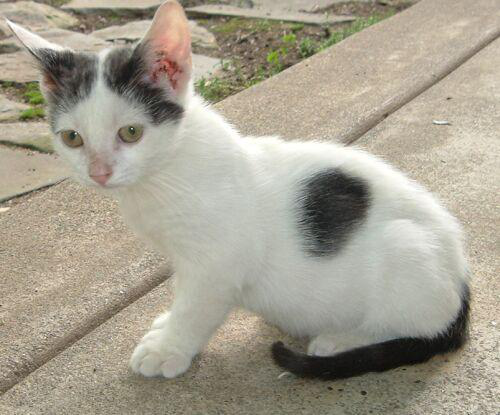

In [2]:
src_img = Image.open(r'C:\Users\oabdo\Desktop\PetImages\Cat\3.jpg')
display(src_img)

In [3]:
np.array(src_img).shape

(415, 500, 3)

In [4]:
281 * 300 * 3


252900

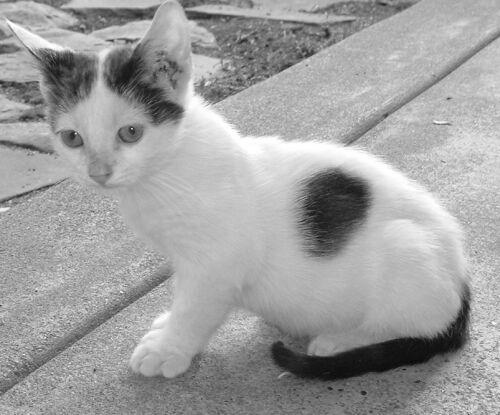

In [5]:
gray_img = ImageOps.grayscale(src_img)
display(gray_img)

In [6]:
np.array(gray_img).shape

(415, 500)

In [7]:
281 * 300


84300

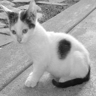

In [8]:
gray_resized_img = gray_img.resize(size=(96, 96))
display(gray_resized_img)

In [9]:
np.array(gray_resized_img).shape

(96, 96)

In [10]:
96 * 96

9216

In [11]:
np.ravel(gray_resized_img)

array([147, 143, 140, ..., 161, 183, 176], dtype=uint8)

In [12]:
img_final = np.ravel(gray_resized_img) / 255.0

In [13]:
img_final

array([0.57647059, 0.56078431, 0.54901961, ..., 0.63137255, 0.71764706,
       0.69019608])

In [14]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [15]:
tst_img = process_image(r'C:\Users\oabdo\Desktop\PetImages\Dog\112.jpg')


In [16]:
tst_img

array([0.45098039, 0.46666667, 0.45490196, ..., 0.59607843, 0.55294118,
       0.34117647])

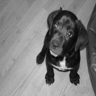

In [17]:
Image.fromarray(np.uint8(tst_img * 255).reshape((96, 96)))

In [18]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [19]:
%%time

train_cat = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Cat'))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Dog'))

train_set = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

Wall time: 2min 23s


In [20]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.662745,0.678431,0.698039,0.713725,0.725490,0.737255,0.749020,0.760784,0.772549,0.780392,...,0.007843,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,Cat
1,0.164706,0.164706,0.200000,0.168627,0.180392,0.160784,0.168627,0.156863,0.172549,0.184314,...,0.188235,0.207843,0.219608,0.215686,0.250980,0.286275,0.266667,0.145098,0.141176,Cat
2,0.133333,0.125490,0.172549,0.176471,0.180392,0.211765,0.223529,0.219608,0.215686,0.215686,...,0.631373,0.596078,0.513725,0.509804,0.556863,0.611765,0.658824,0.670588,0.603922,Cat
3,0.870588,0.874510,0.870588,0.886275,0.894118,0.882353,0.894118,0.909804,0.898039,0.894118,...,0.854902,0.796078,0.800000,0.803922,0.835294,0.866667,0.850980,0.831373,0.835294,Cat
4,0.435294,0.458824,0.494118,0.345098,0.274510,0.415686,0.533333,0.545098,0.713725,0.580392,...,0.364706,0.384314,0.368627,0.368627,0.450980,0.396078,0.349020,0.364706,0.325490,Cat


In [21]:
train_set.shape

(24998, 9217)

In [22]:
%%time

test_cat = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Cat'))
test_dog = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Dog'))

test_set = pd.concat([test_cat, test_dog], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)

Wall time: 2min 37s


In [23]:
test_set.shape

(24998, 9217)

In [24]:
%%time

valid_cat = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Cat'))
valid_dog = process_folder(folder=pathlib.Path.cwd().joinpath(r'C:\Users\oabdo\Desktop\PetImages\Dog'))

valid_set = pd.concat([valid_cat, valid_dog], axis=0)

with open('valid_set.pkl', 'wb') as f:
    pickle.dump(valid_set, f)

Wall time: 2min 36s


In [25]:
valid_set.shape

(24998, 9217)

In [26]:
train_set = shuffle(train_set).reset_index(drop=True)
valid_set = shuffle(valid_set).reset_index(drop=True)

In [27]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.886275,0.854902,0.858824,0.874510,0.870588,0.839216,0.760784,0.823529,0.862745,0.682353,...,0.498039,0.407843,0.392157,0.313725,0.333333,0.388235,0.431373,0.352941,0.388235,Dog
1,0.078431,0.078431,0.078431,0.086275,0.086275,0.388235,0.596078,0.588235,0.596078,0.600000,...,0.349020,0.345098,0.333333,0.325490,0.321569,0.321569,0.313725,0.309804,0.298039,Dog
2,0.564706,0.580392,0.592157,0.600000,0.607843,0.611765,0.611765,0.611765,0.615686,0.615686,...,0.533333,0.541176,0.549020,0.521569,0.513725,0.513725,0.517647,0.505882,0.501961,Cat
3,0.831373,0.843137,0.847059,0.858824,0.862745,0.878431,0.890196,0.894118,0.901961,0.905882,...,0.862745,0.325490,0.133333,0.149020,0.172549,0.203922,0.227451,0.247059,0.305882,Dog
4,0.360784,0.337255,0.203922,0.149020,0.290196,0.341176,0.396078,0.407843,0.384314,0.290196,...,0.450980,0.254902,0.105882,0.184314,0.533333,0.423529,0.082353,0.125490,0.215686,Cat


In [28]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_valid = valid_set.drop('class', axis=1)
y_valid = valid_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [29]:
y_train.factorize()

(array([0, 0, 1, ..., 1, 0, 1], dtype=int64),
 Index(['Dog', 'Cat'], dtype='object'))

In [30]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=2)

In [31]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
196/196 [==============================] - 53s 266ms/step - loss: 1.0039 - accuracy: 0.5258 - val_loss: 0.7345 - val_accuracy: 0.5315
Epoch 2/100
196/196 [==============================] - 21s 106ms/step - loss: 0.6706 - accuracy: 0.5887 - val_loss: 0.6541 - val_accuracy: 0.6132
Epoch 3/100
196/196 [==============================] - 22s 112ms/step - loss: 0.6591 - accuracy: 0.6064 - val_loss: 0.6555 - val_accuracy: 0.6126
Epoch 4/100
196/196 [==============================] - 22s 110ms/step - loss: 0.6550 - accuracy: 0.6120 - val_loss: 0.6486 - val_accuracy: 0.6221
Epoch 5/100
196/196 [==============================] - 21s 108ms/step - loss: 0.6523 - accuracy: 0.6135 - val_loss: 0.6481 - val_accuracy: 0.6218
Epoch 6/100
196/196 [==============================] - 21s 108ms/step - loss: 0.6473 - accuracy: 0.6238 - val_loss: 0.6389 - val_accuracy: 0.6314
Epoch 7/100
196/196 [==============================] - 22s 111ms/step - loss: 0.6448 - accuracy: 0.6259 - val_loss: 0.6382 -

In [33]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

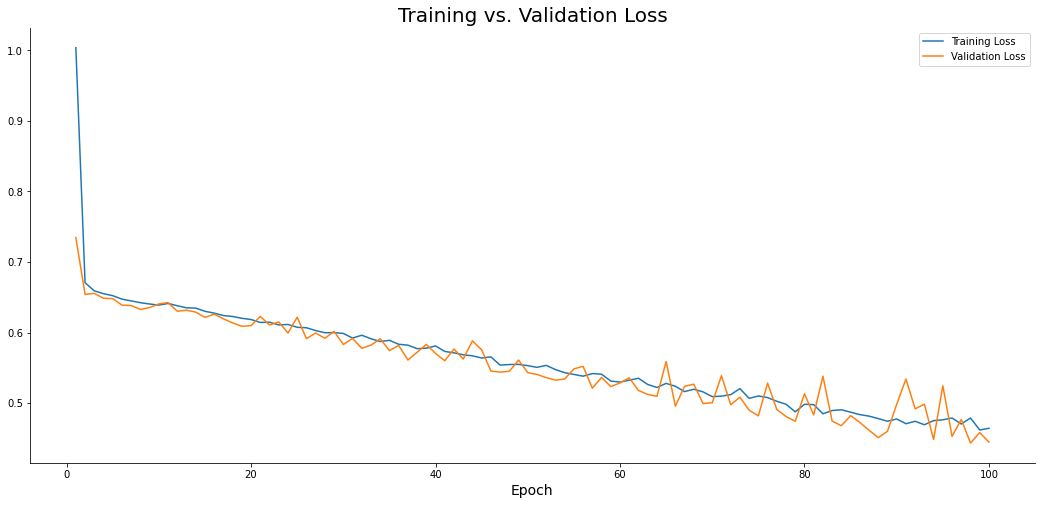

In [38]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 101), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

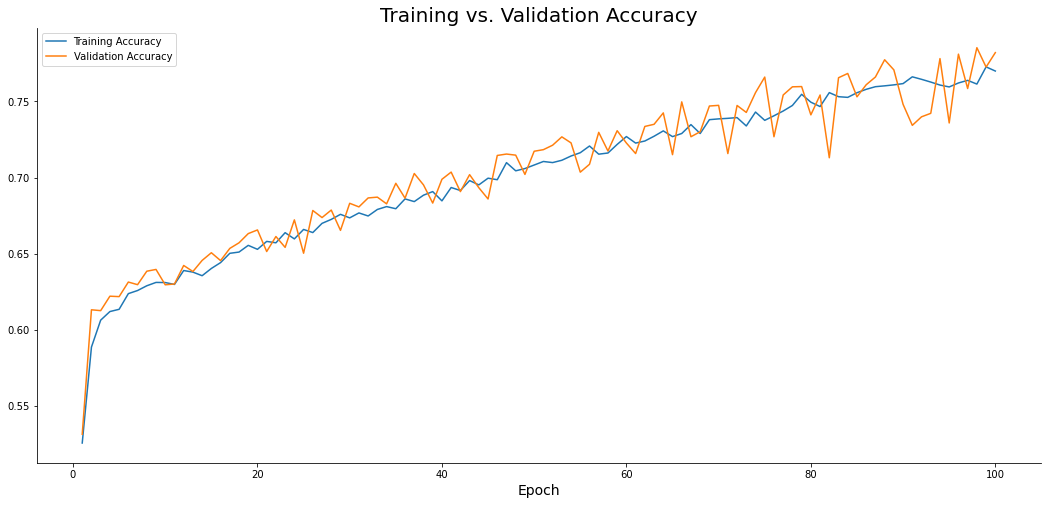

In [35]:
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 101), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [36]:
print(X_train)

           0         1         2         3         4         5         6     \
0      0.886275  0.854902  0.858824  0.874510  0.870588  0.839216  0.760784   
1      0.078431  0.078431  0.078431  0.086275  0.086275  0.388235  0.596078   
2      0.564706  0.580392  0.592157  0.600000  0.607843  0.611765  0.611765   
3      0.831373  0.843137  0.847059  0.858824  0.862745  0.878431  0.890196   
4      0.360784  0.337255  0.203922  0.149020  0.290196  0.341176  0.396078   
...         ...       ...       ...       ...       ...       ...       ...   
24993  0.435294  0.454902  0.486275  0.494118  0.490196  0.501961  0.517647   
24994  0.431373  0.423529  0.407843  0.411765  0.400000  0.368627  0.356863   
24995  0.298039  0.317647  0.356863  0.411765  0.431373  0.419608  0.368627   
24996  0.352941  0.309804  0.301961  0.415686  0.388235  0.349020  0.364706   
24997  0.482353  0.533333  0.580392  0.521569  0.501961  0.549020  0.603922   

           7         8         9     ...      9206 

In [39]:
print(test_score)

NameError: name 'test_score' is not defined

In [40]:
print("test acc", test_score)

NameError: name 'test_score' is not defined

In [41]:
print(accuracy)

NameError: name 'accuracy' is not defined

In [42]:
print(accuracy)

NameError: name 'accuracy' is not defined

In [43]:
print(X_test)

           0         1         2         3         4         5         6     \
0      0.662745  0.678431  0.698039  0.713725  0.725490  0.737255  0.749020   
1      0.164706  0.164706  0.200000  0.168627  0.180392  0.160784  0.168627   
2      0.133333  0.125490  0.172549  0.176471  0.180392  0.211765  0.223529   
3      0.870588  0.874510  0.870588  0.886275  0.894118  0.882353  0.894118   
4      0.435294  0.458824  0.494118  0.345098  0.274510  0.415686  0.533333   
...         ...       ...       ...       ...       ...       ...       ...   
12494  0.552941  0.560784  0.560784  0.568627  0.572549  0.576471  0.580392   
12495  0.400000  0.321569  0.364706  0.372549  0.337255  0.388235  0.317647   
12496  0.176471  0.168627  0.196078  0.231373  0.243137  0.196078  0.207843   
12497  0.996078  0.976471  0.952941  0.913725  0.866667  0.807843  0.705882   
12498  0.945098  0.956863  0.960784  0.956863  0.945098  0.949020  0.968627   

           7         8         9     ...      9206 

In [44]:
print(X_validation)

NameError: name 'X_validation' is not defined

In [45]:
print(X_Validation)

NameError: name 'X_Validation' is not defined

In [47]:
score= history.history['val_accuracy']
print(score)

[0.5315225124359131, 0.613209068775177, 0.6126490235328674, 0.6221297979354858, 0.621849775314331, 0.631410539150238, 0.6296903491020203, 0.6385310888290405, 0.639691174030304, 0.6296103596687317, 0.630130410194397, 0.6422913670539856, 0.6383310556411743, 0.6456116437911987, 0.6506520509719849, 0.6454916596412659, 0.653492271900177, 0.6571725606918335, 0.6632130742073059, 0.6656132340431213, 0.6514521241188049, 0.6612929105758667, 0.6541723608970642, 0.6722137928009033, 0.6503320336341858, 0.6783742904663086, 0.6737338900566101, 0.6786543130874634, 0.6653332114219666, 0.6830946207046509, 0.6807344555854797, 0.6866149306297302, 0.6871349811553955, 0.6827346086502075, 0.6962156891822815, 0.6864548921585083, 0.7026562094688416, 0.6951755881309509, 0.6832546591758728, 0.6988559365272522, 0.7035762667655945, 0.6907752752304077, 0.7018961310386658, 0.6933354735374451, 0.6859349012374878, 0.7144971489906311, 0.715417206287384, 0.7146971821784973, 0.7020561695098877, 0.7172573804855347, 0.7182

In [48]:
#rock curve
fig=plot_roc_curve(tf, X_test,y_test)
plt.title("ROC CURVE")
plt.show()

NameError: name 'plot_roc_curve' is not defined

ValueError: x and y must have same first dimension, but have shapes (100,) and (24998, 9216)

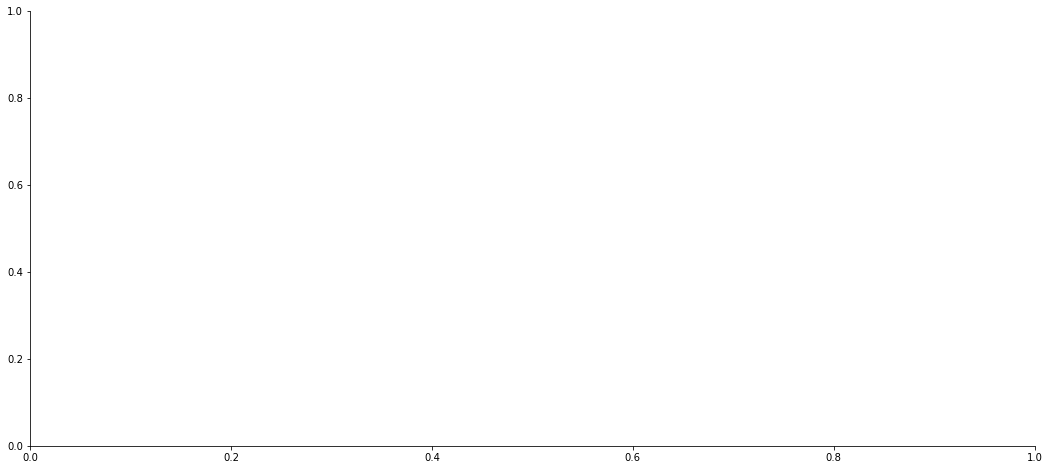

In [49]:
plt.plot(np.arange(1, 101), X_test, label='Training Accuracy')
plt.plot(np.arange(1, 101), y_test, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [52]:
confusion_matrix(y_test, X_test)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [53]:
confusion_matrix(y_train, X_train)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets